L-curve criterion
===
By P.C. Hansen

Diffinition
---

Practically, in order to solve inversion problems, we need to consider the similaer form of least-squeares equations as follows:

\begin{align}
x_\lambda = \arg\min\{||Ax - b||_2^2 + \lambda\cdot||L(x - x_0)||_2^2\}.
\end{align}

$\lambda$ is a real regularization parameter that must be chosen by the user. The vector $b$ is the given data and the vector $x_0$ is a priori estimate of $x$ which is set to zero when no a priori information is available.
$||Ax - b||_2$ is the residual term and $||L(x - x_0)||_2$ is the regularization term.
$\lambda$ is the parameter which decides the contribution to these terms.
And L-curve criterion is the method to balance between these contribution and optmize the inversion solution.

L-curve is precisely following points curve:
\begin{align}
(||Ax - b||_2, ||L(x - x_0)||_2)
\end{align}

L-curve criterion is based on the fact that the optimal reguralization paramter is acheived when the L-curve point:

\begin{align}
(\log||Ax_\lambda - b||_2,\; \log||L(x_\lambda - x_0)||_2)
\end{align}

lies on this corner.

In order to obtain the strict $\lambda$ on the L-curve "corner" which is defined by the mathmatical method, we can calculate the L-curve carvature $\kappa$ given by following equation:

\begin{align}
\kappa &= \frac{f^{\prime\prime}(x)}{\left[1 + f^{\prime}(x)^2\right]^{3/2}}=-2 \eta\rho\frac{\lambda^4 \eta + \lambda^2 \rho + 2\lambda\rho\eta/\eta^\prime}{(\lambda^2 \eta^2 + \rho^2)^{3/2}},\\
\rho &\equiv ||Ax_\lambda - b||_2^2,\\
\eta &\equiv ||L(x_\lambda - x_0)||_2^2,\\
\eta^\prime &\equiv \frac{d\eta}{d\lambda}
\end{align}

Using the singular value decomposion fomula, $x_\lambda$ is described as follows:

\begin{align}
x_\lambda &= \sum_{i=1}^K w_i(\lambda) \frac{(u_i, b)}{\sigma_i}L^{-1}v_i,\\
w_i(\lambda) &\equiv \frac{1}{1 + \lambda/\sigma_i^2},\\
U\Sigma V^T \equiv (u_1, u_2, ...) &\cdot \text{diag}(\sigma_1, \sigma_2,...) \cdot (v_1, v_2, ...)^T = AL^{-1},
\end{align}


where $K\equiv\min(M, N)$, which means the size of matrices: $U=\text{Mat}(M, M)$, $\Sigma=\text{Mat}(M, N)$, $V=\text{Mat}(N, N)$, and a priori estimate $x_0$ is assumed to be 0 here.

Also $\rho, \eta,$ and $\eta^\prime$ is described by using SVD as follows:

\begin{align}
\rho &= \sum_{i=1}^K (1 - w_i)^2(u_i, b)^2,\\
\eta &= \sum_{i=1}^K w_i^2 \frac{(u_i, b)^2}{\sigma_i^2},\\
\eta^\prime &= -\frac{2}{\lambda}\sum_{i=1}^K (1 - w_i)w_i^2\frac{(u_i, b)^2}{\sigma_i^2}.
\end{align}

Example ill-posed linear operator equation and applying L-curve criterion into this problem.
---

As a famouse ill-posed linear equation, Fredholm integral equation is often used:
$$
\int_a^b K(s, t) x(t) dt = b(s), \quad c\leq s\leq d.
$$
Here, we think the following situation as above equation form:

\begin{align}
K(s, t) &\equiv (\cos(s) + \cos(t))\left(\frac{\sin(u)}{u}\right)^2,\\
u &\equiv \pi\left(\sin(s) + \sin(t) \right),\\
[a, b] &= [c, d] = \left[-\frac{\pi}{2}, \frac{\pi}{2} \right].
\end{align}

And, the true solution $x_\text{t}(t)$ is assumed as follows:

$$
x_\text{t}(t) = 2.0 \exp\left[-6(t-0.8)^2 \right] + \exp\left[-2(t+0.5)^2 \right]
$$

let us define these function as follows:

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from cherab.phix.inversion import Lcurve, curvature
plt.rcParams["figure.dpi"] = 200

# Kernel of Fredholm integral equation
def kernel(s, t):
    u = np.pi * (np.sin(s) + np.sin(t))
    if u == 0:
        return (np.cos(s) + np.cos(t))
    else:
        return (np.cos(s) + np.cos(t)) * (np.sin(u) / u) ** 2

# true solution
def x_t_func(t):
    return 2.0 * np.exp(-6.0 * (t - 0.8) ** 2) + np.exp(-2.0 * (t + 0.5) ** 2)

Let's descritize the above integral equation. $s$ and $t$ are devided to 100 points at even intervals.
$x$ is a 1D vector data $(100, )$ and $A$ is a $100\times 100$ matrix.
$A$ is defined using karnel function. When discretizing the integral, the trapezoidal approximation is applied.

In [15]:
# set valiables
s = np.linspace(-np.pi * 0.5, np.pi * 0.5, num=100)
t = np.linspace(-np.pi * 0.5, np.pi * 0.5, num=100)
x_t = x_t_func(t)

# Operater matrix: A
A = np.zeros((s.size, t.size))
A = np.array([[kernel(i, j) for j in t] for i in s])

# trapezoidal rule
A[:, 0] *= 0.5
A[:,-1] *= 0.5
A *= t[1] - t[0]

# simpson rule  -- option
# A[:, 1:-1:2] *= 4.0
# A[:, 2:-2:2] *= 2.0
# A *= (t[1] - t[0]) / 3.0

print(f"condition number of A is {np.linalg.cond(A)}")

condition number of A is 1.297436536063759e+19


Then excute singular value decomposition of $A$

In [16]:
# SVD using the numpy module
u, sigma, vh = np.linalg.svd(A, full_matrices=False)


The measured data $b$ is added white noise $\bar{b}$, and truly converted $b_0$ is computed from $Ax_\text{t}$.

Descritized linear equation is as follows:

\begin{align}
Ax = b_0 + \bar{b} = b
\end{align}

The noise variance is $1.0 \times 10^{-4}$.

In [17]:
b_0 = A.dot(x_t)
b_noise = np.random.normal(0, 1.e-4, b_0.size)
b = b_0 + b_noise

In term of regularization, let us think tikhonov regularization, that is, $L = I$ and $x_0 = 0$.
And as an optimization method of regulariation parameters, use L curve method as described above.


In [18]:
lcurv = Lcurve(sigma, u, vh, b)
lcurv.lambdas = 10 ** np.linspace(-20, 2, 100)
lcurv.optimize(6) # iteration times to find the maximum carvature

completed the optimization (iteration times : 6)


Plot measured data w or w/o noise
---

The noise level is so mute that there is no clear difference between those. However this causes to arise the ill-posed problem due to the kernel function.

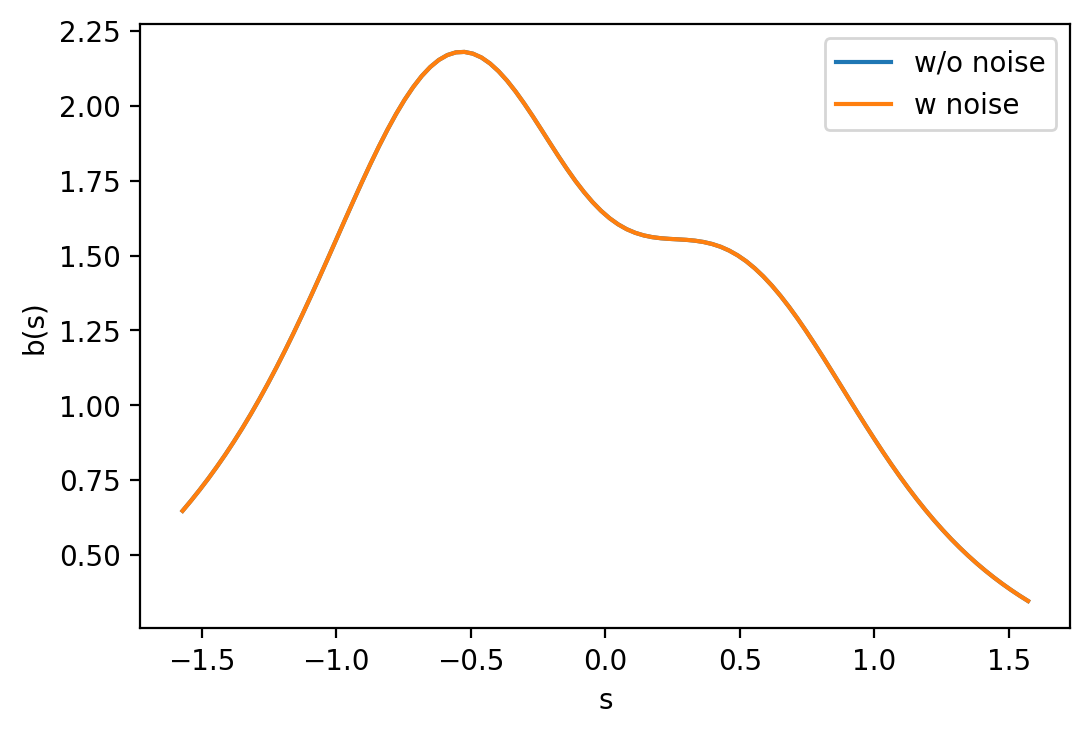

In [19]:
plt.plot(s, b_0);
plt.plot(s, b);
plt.legend(["w/o noise", "w noise"]);
plt.xlabel("s")
plt.ylabel("b(s)");

Plot L-curve
---

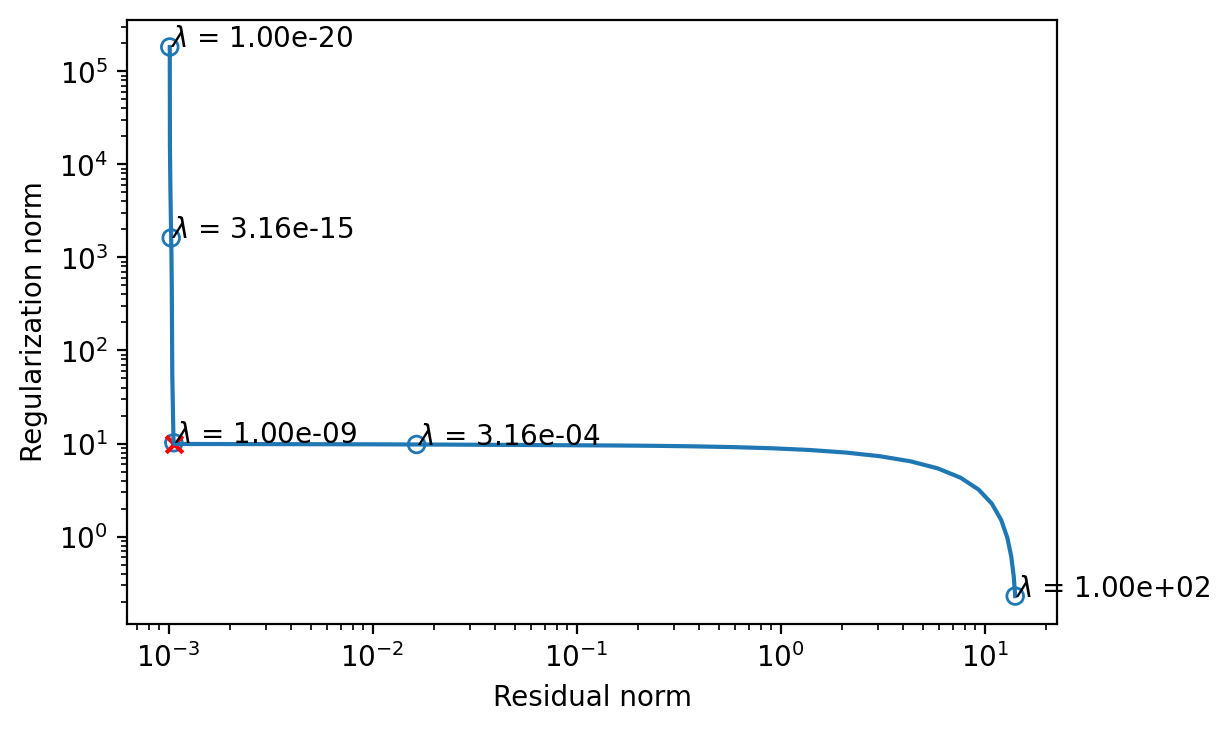

In [20]:
lcurv.plot_L_curve(scatter_plot=5, scatter_annotate=True);

Compare true solution $x_\text{t}$ with estimated $x_\lambda$
---

Varing regularization parameters makes the interestingly difference between the true solution with estimated one.\
Here, let us compare the solutions varied from $\lambda=10^{-10}, \lambda_\text{opt}, 1.0$. ($\lambda_\text{opt}$ is the optimized regularization parameter.)

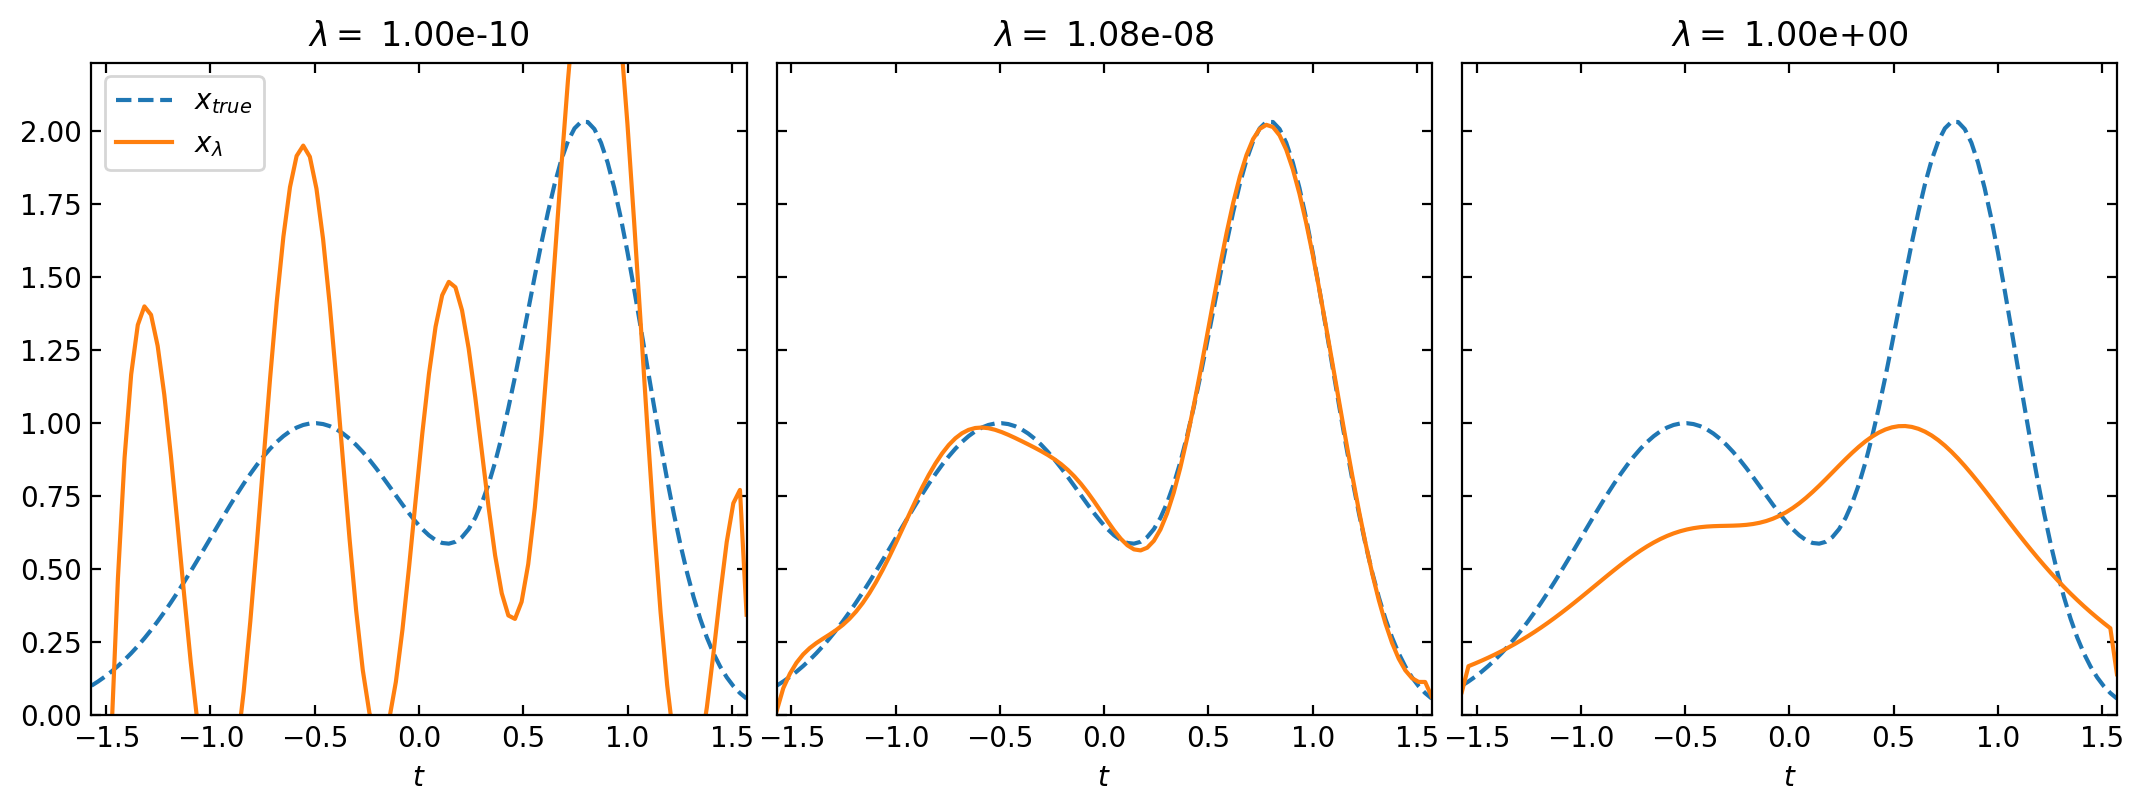

In [21]:
lambdas = [1.0e-10, lcurv.lambda_opt, 1.0]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
fig.tight_layout(pad=-2.0)
labels = [f"$\lambda =$ {i:.2e}" for i in lambdas]
i = 0
for ax, beta, label in zip(axes, lambdas, labels):
    ax.plot(t, x_t, "--" ,label="$x_{true}$")
    ax.plot(t, lcurv.inverted_solution(beta=beta), label="$x_\lambda$")

    ax.set_xlim([t.min(), t.max()])
    ax.set_ylim([0, x_t.max() * 1.1])
    ax.set_xlabel("$t$")
    ax.set_title(label)
    ax.tick_params(direction='in', labelsize=10, which='both', top=True, right=True)
    if i < 1:
        ax.legend()
    else:
        ax.set_yticklabels([])
    i += 1

plot L-curve curvature
---

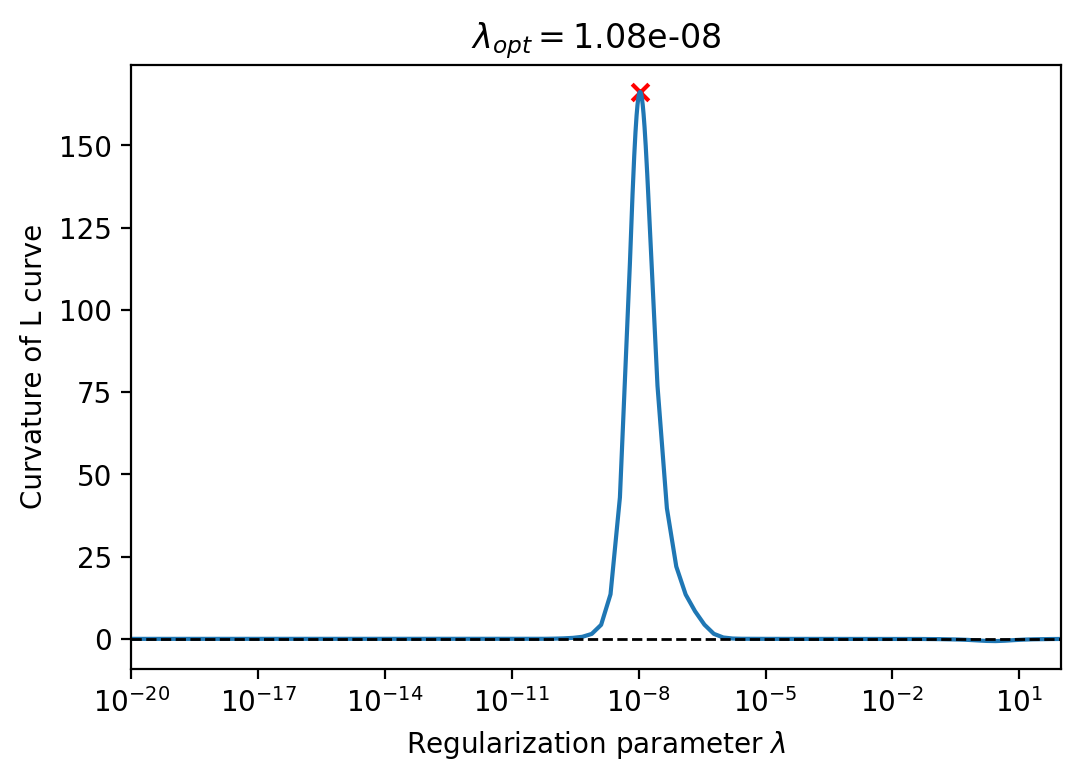

In [22]:
_, ax = lcurv.plot_curvature()
ax.set_title("$\lambda_{} = ${:.2e}".format("{opt}", lcurv.lambda_opt));

checking the error of solutions
----

The relative error is defined as follows:
\begin{align}
e(\lambda) = \frac{||x_\lambda - x_\text{t}||}{||x_\text{t}||}.
\end{align}

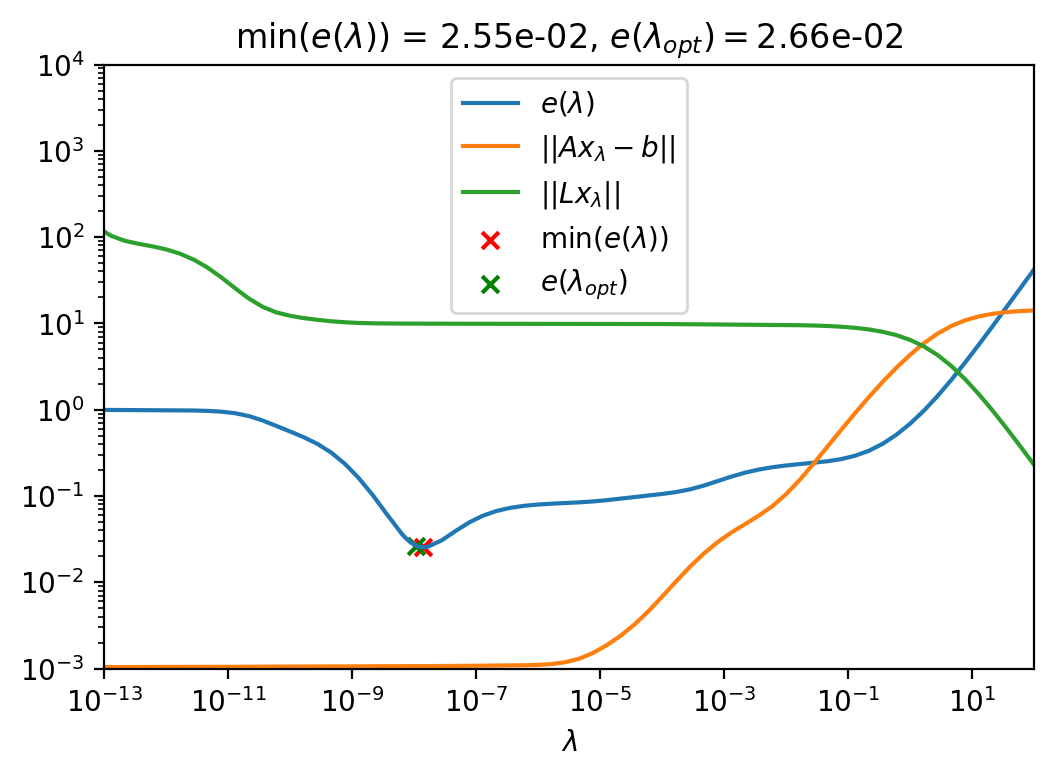

In [23]:
def error(values, true):
    return np.linalg.norm(values - true) / np.linalg.norm(values)

errors = np.asarray([error(lcurv.inverted_solution(beta), x_t) for beta in lcurv.lambdas])
lambda_min = lcurv.lambdas[errors.argmin()]
error_min = errors.min()
error_opt = errors[np.where(lcurv.lambdas==lcurv.lambda_opt)[0][0]]

fig, ax = plt.subplots()
line_error, = ax.loglog(lcurv.lambdas, errors)
min_sol = ax.scatter(lambda_min, error_min, marker="x", color="r")
opt = ax.scatter(lcurv.lambda_opt, error_opt, marker="x", color="g")

residu, = ax.loglog(lcurv.lambdas, [lcurv.residual_norm(beta) for beta in lcurv.lambdas])
regu, = ax.loglog(lcurv.lambdas, [lcurv.regularization_norm(beta) for beta in lcurv.lambdas])
ax.set_xlim(1.e-13, 1.e+2)
ax.set_ylim(1e-3, 1e4)
ax.set_xlabel("$\lambda$");
ax.legend([line_error, residu, regu, min_sol, opt],
          ["$e(\lambda)$", "$||Ax_\lambda-b||$", "$||Lx_\lambda||$", "min($e(\lambda)$)", "$e(\lambda_{opt})$"]);
ax.set_title("min($e(\lambda)$) = {:.2e}, $e(\lambda_{}) = ${:.2e}".format(error_min, "{opt}", error_opt));

Compare minimum error solution with Lcurve-optimized $x_\lambda$ one
---

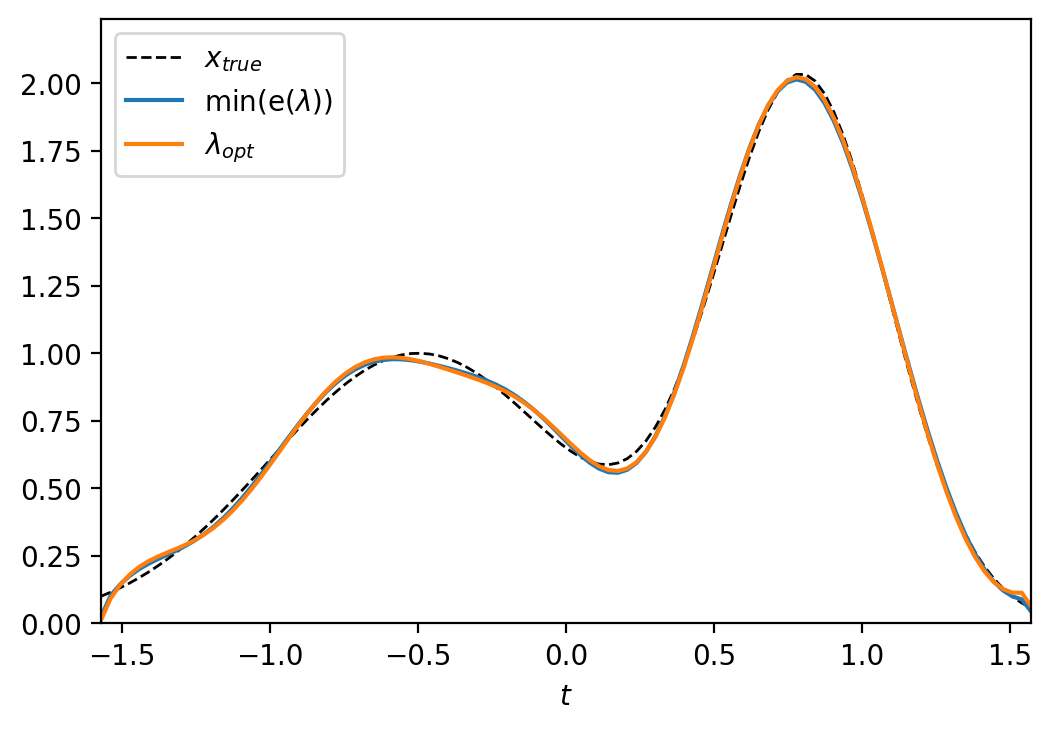

In [24]:
fig, ax = plt.subplots()
ax.plot(t, x_t, "k--",label="$x_{true}$", linewidth=1.0)
ax.plot(t, lcurv.inverted_solution(beta=lambda_min), label="min(e($\lambda$))")
ax.plot(t, lcurv.inverted_solution(beta=lcurv.lambda_opt), label="$\lambda_{opt}$")
ax.set_xlabel("$t$")
ax.set_xlim([t.min(), t.max()])
ax.set_ylim([0, x_t.max() * 1.1])
ax.legend();

GCV criterion for choosing reguralizaion $\lambda$
===

Diffinition
---

Generalized Cross-Validation's idea is that the best modell for the measurements is the one that best predicts each measurement as a function of the others.
The GCV estimate of $\lambda$ is chosen as follows:

\begin{align}
\lambda_\text{opt} &:= \arg \min_{\lambda} GCV(\lambda)\\
GCV(\lambda) &:= \frac{\rho(\lambda)}{|1 - \text{tr}{T(\lambda)}|^2},
\end{align}
where
\begin{align}
\rho(\lambda) &:= ||Ax_\lambda - b||^2\\
T(\lambda)b &:= Ax_\lambda.
\end{align}

Using SVD components, $GCV(\lambda)$ is replaced as follows:
\begin{align}
GCV(\lambda) = \frac{\rho(\lambda)}{\left[1 - \sum_{i=1}^N w_i(\lambda) \right]^2}.
\end{align}

In [25]:
from cherab.phix.inversion import GCV
gcv = GCV(sigma, u, vh, b)
gcv.lambdas = 10 ** np.linspace(-20, 2, 100)
gcv.optimize(6)

completed the optimization (iteration times : 6)


Plotting error function and GCV
---

The results of the GCV optimization shows that GCV does not work for this inversion problem.

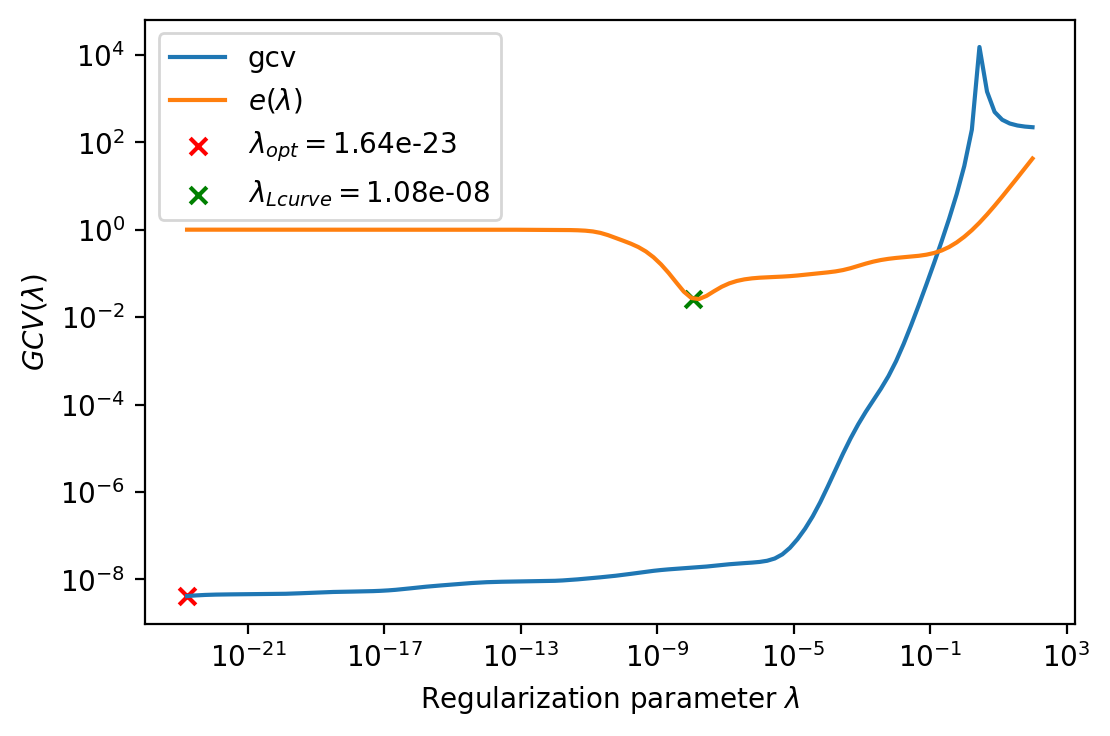

In [26]:
error_gcv = np.asarray([error(gcv.inverted_solution(beta), x_t) for beta in gcv.lambdas])

fig, ax = gcv.plot_gcv()
ax.loglog(gcv.lambdas, error_gcv, "C1");
opt = ax.scatter(lcurv.lambda_opt, error_opt, marker="x", color="g")
ax.legend(["gcv",
           "$e(\lambda)$",
           "$\lambda_{} = ${:.2e}".format("{opt}", gcv.lambda_opt),
           "$\lambda_{} = ${:.2e}".format("{Lcurve}", lcurv.lambda_opt)
          ]
         );